In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")

In [6]:
print("First 5 rows of dataset:")
print(titanic.head())

print("\nDataset Info:")
print(titanic.info())

print("\nMissing values count:")
print(titanic.isnull().sum())

First 5 rows of dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       -------------

In [7]:
titanic['deck'] = titanic['deck'].astype('category')
titanic['deck'] = titanic['deck'].cat.add_categories(['Unknown'])
titanic['deck'] = titanic['deck'].fillna('Unknown')

titanic = titanic.dropna(subset=['embark_town'])

categorical_cols = ['sex', 'class', 'embarked', 'who', 'deck', 'embark_town', 'alive']
titanic[categorical_cols] = titanic[categorical_cols].astype('category')

print("\nAfter cleaning:")
print(titanic.info())



After cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    category
 3   age          712 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    category
 8   class        889 non-null    category
 9   who          889 non-null    category
 10  adult_male   889 non-null    bool    
 11  deck         889 non-null    category
 12  embark_town  889 non-null    category
 13  alive        889 non-null    category
 14  alone        889 non-null    bool    
dtypes: bool(2), category(7), float64(2), int64(4)
memory usage: 57.5 KB
None


In [8]:
print("\nSummary Statistics:")
print(titanic.describe(include='all'))

survival_by_gender = titanic.groupby('sex', observed=True)['survived'].mean()
print("\nSurvival Rate by Gender:")
print(survival_by_gender)

survival_by_class = titanic.groupby('class', observed=True)['survived'].mean()
print("\nSurvival Rate by Class:")
print(survival_by_class)


Summary Statistics:
          survived      pclass   sex         age       sibsp       parch  \
count   889.000000  889.000000   889  712.000000  889.000000  889.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.382452    2.311586   NaN   29.642093    0.524184    0.382452   
std       0.486260    0.834700   NaN   14.492933    1.103705    0.806761   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.000000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male     deck  embar

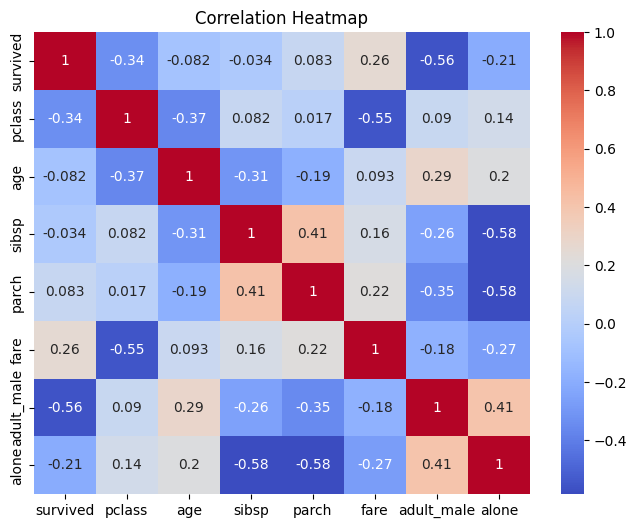

In [9]:
corr = titanic.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

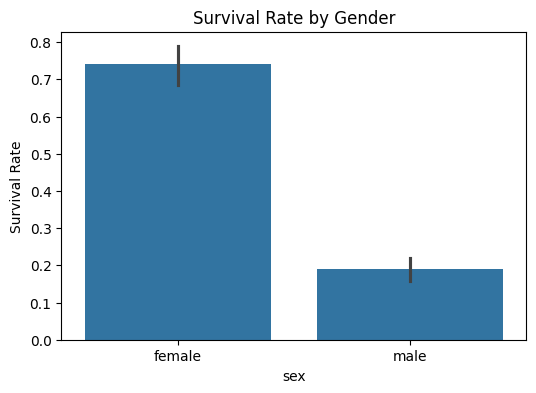

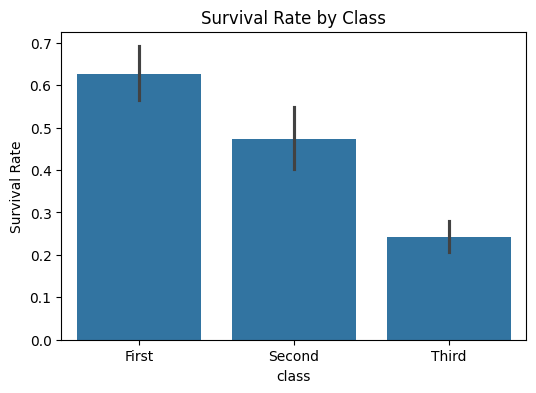

In [10]:
plt.figure(figsize=(6,4))
sns.barplot(x='sex', y='survived', data=titanic)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='class', y='survived', data=titanic, order=['First','Second','Third'])
plt.title("Survival Rate by Class")
plt.ylabel("Survival Rate")
plt.show()

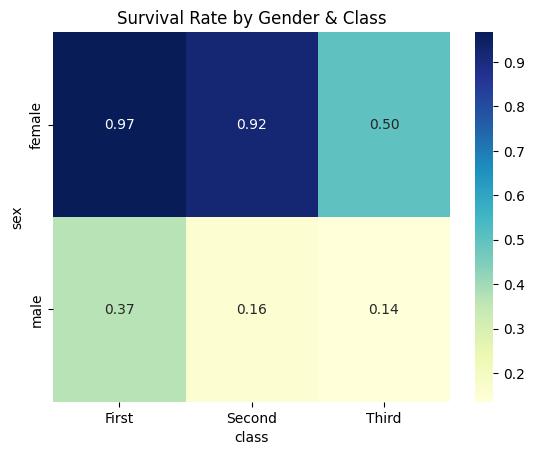

In [11]:
pivot_table = titanic.pivot_table(
    values='survived', 
    index='sex', 
    columns='class',
    observed=True  
)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Survival Rate by Gender & Class")
plt.show()